# Training and testing dataset generation using LeR

* `ler` package is used to generate training and testing datasets.

* It assumes theoretically or observationally available astrophysical models.

* Input parameters for ANN needs all the intrinsic and extrinsic parameters of the source.

* Output parameters are the net optimal SNR of the given network of data.

* The dataset is more accumulated between the SNR range 2-16; with the assumption that SNR threshold cut for detection around 8.

* The dataset is generated for the network of 3 detectors, namely, LIGO Hanford, LIGO Livingston, and Virgo.

* Waveform model used is IMRPhenomXPHM with spin and precession effects.

* ANN needs at-least 100000 samples for training and testing.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import contextlib
from ler.rates import LeR
from ler.utils import append_json, load_json

In [39]:
# initialize the LeR class
ler = LeR(
    npool=6,
    z_max=3,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    verbose=False,
)

## Collection of data at the desired SNR range

In [40]:
ler.batch_size = 100000

len_ = 0
while len_<10000:
    with contextlib.redirect_stdout(None):
        unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False)

    # SNR for each detector
    detectors = ["L1", "H1", "V1"]
    for i,det in enumerate(detectors):
        snr = np.array(unlensed_param[det])

        idx1 = np.argwhere(snr<2).flatten()
        idx2 = np.argwhere((snr>=2) & (snr<4)).flatten()
        idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
        idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
        idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
        idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
        idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
        idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
        idx16 = np.argwhere(snr>=16).flatten()

        unlensed_param1 = {}
        unlensed_param2 = {}
        unlensed_param3 = {}
        unlensed_param4 = {}
        unlensed_param5 = {}
        unlensed_param6 = {}
        unlensed_param7 = {}
        unlensed_param8 = {}
        unlensed_param16 = {}
        unlensed_param_joint = {}
        len_idx16 = len(idx16)

        for key, value in unlensed_param.items():
            if len(idx1)>len_idx16:
                unlensed_param1[key] = value[idx1][:len_idx16]
            else:
                unlensed_param1[key] = value[idx1]
            if len(idx2)>len_idx16:
                unlensed_param2[key] = value[idx2][:len_idx16]
            else:
                unlensed_param2[key] = value[idx2]
            if len(idx3)>len_idx16:
                unlensed_param3[key] = value[idx3][:len_idx16]
            else:
                unlensed_param3[key] = value[idx3]
            if len(idx4)>len_idx16:
                unlensed_param4[key] = value[idx4][:len_idx16]
            else:
                unlensed_param4[key] = value[idx4]
            if len(idx5)>len_idx16:
                unlensed_param5[key] = value[idx5][:len_idx16]
            else:
                unlensed_param5[key] = value[idx5]
            if len(idx6)>len_idx16:
                unlensed_param6[key] = value[idx6][:len_idx16]
            else:
                unlensed_param6[key] = value[idx6]
            if len(idx7)>len_idx16:
                unlensed_param7[key] = value[idx7][:len_idx16]
            else:
                unlensed_param7[key] = value[idx7]
            if len(idx8)>len_idx16:
                unlensed_param8[key] = value[idx8][:len_idx16]
            else:
                unlensed_param8[key] = value[idx8]
            unlensed_param16[key] = value[idx16]
            
            unlensed_param[key] = np.concatenate([unlensed_param1[key], unlensed_param2[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

        # save the parameters
        append_json("snr_"+det+".json", unlensed_param, replace=False)

    unlensed_params = load_json("snr_"+det+".json")
    len_ = len(np.array(unlensed_params[det]))

    print(f"Number of events: {len_}")

  0%|                                                                     | 0/96800 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
## This is data collection based of 'optimal snr net' range
 
# ler.batch_size = 100000

# len_ = 0
# while len_<100000:
#     with contextlib.redirect_stdout(None):
#         unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False)
#     snr = np.sqrt(unlensed_param["L1"]**2 + unlensed_param["H1"]**2 + unlensed_param["V1"]**2)

#     idx1 = np.argwhere(snr<2).flatten()
#     idx2 = np.argwhere((snr>=2) & (snr<4)).flatten()
#     idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
#     idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
#     idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
#     idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
#     idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
#     idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
#     idx16 = np.argwhere(snr>=16).flatten()

#     unlensed_param1 = {}
#     unlensed_param2 = {}
#     unlensed_param3 = {}
#     unlensed_param4 = {}
#     unlensed_param5 = {}
#     unlensed_param6 = {}
#     unlensed_param7 = {}
#     unlensed_param8 = {}
#     unlensed_param16 = {}
#     unlensed_param_joint = {}

#     len_idx16 = len(idx16)

#     for key, value in unlensed_param.items():
#         if len(idx1)>len_idx16:
#             unlensed_param1[key] = value[idx1][:len_idx16]
#         else:
#             unlensed_param1[key] = value[idx1]
#         if len(idx2)>len_idx16:
#             unlensed_param2[key] = value[idx2][:len_idx16]
#         else:
#             unlensed_param2[key] = value[idx2]
#         if len(idx3)>len_idx16:
#             unlensed_param3[key] = value[idx3][:len_idx16]
#         else:
#             unlensed_param3[key] = value[idx3]
#         if len(idx4)>len_idx16:
#             unlensed_param4[key] = value[idx4][:len_idx16]
#         else:
#             unlensed_param4[key] = value[idx4]
#         if len(idx5)>len_idx16:
#             unlensed_param5[key] = value[idx5][:len_idx16]
#         else:
#             unlensed_param5[key] = value[idx5]
#         if len(idx6)>len_idx16:
#             unlensed_param6[key] = value[idx6][:len_idx16]
#         else:
#             unlensed_param6[key] = value[idx6]
#         if len(idx7)>len_idx16:
#             unlensed_param7[key] = value[idx7][:len_idx16]
#         else:
#             unlensed_param7[key] = value[idx7]
#         if len(idx8)>len_idx16:
#             unlensed_param8[key] = value[idx8][:len_idx16]
#         else:
#             unlensed_param8[key] = value[idx8]
#         unlensed_param16[key] = value[idx16]
#         unlensed_param_joint[key] = np.concatenate([unlensed_param1[key], unlensed_param2[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

#     append_json("joint_new_optsnr.json", unlensed_param_joint, replace=False)
#     unlensed_params = load_json("joint_new_optsnr.json")
#     len_ = len(np.array(unlensed_params["optimal_snr_net"]))

#     print(f"Number of events: {len_}")

  0%|                                                                     | 0/96774 [00:00<?, ?it/s]

Number of events: 78083


  0%|                                                                     | 0/96750 [00:00<?, ?it/s]

Number of events: 79634


  0%|                                                                     | 0/96755 [00:00<?, ?it/s]

Number of events: 81122


  0%|                                                                     | 0/96787 [00:00<?, ?it/s]

Number of events: 82842


  0%|                                                                     | 0/96765 [00:00<?, ?it/s]

Number of events: 84402


  0%|                                                                     | 0/96755 [00:00<?, ?it/s]

Number of events: 86112


  0%|                                                                     | 0/96796 [00:00<?, ?it/s]

Number of events: 87455


  0%|                                                                     | 0/96814 [00:00<?, ?it/s]

Number of events: 89169


  0%|                                                                     | 0/96714 [00:00<?, ?it/s]

Number of events: 90721


  0%|                                                                     | 0/96774 [00:00<?, ?it/s]

Number of events: 92255


  0%|                                                                     | 0/96671 [00:00<?, ?it/s]

Number of events: 93731


  0%|                                                                     | 0/96770 [00:00<?, ?it/s]

Number of events: 95244


  0%|                                                                     | 0/96804 [00:00<?, ?it/s]

Number of events: 96821


  0%|                                                                     | 0/96697 [00:00<?, ?it/s]

Number of events: 98303


100%|████████████████████████████████████████████████████████| 96697/96697 [02:41<00:00, 599.31it/s]


Number of events: 100007


In [ ]:
# getting data
#unlensed_params = load_json("joint_new_optsnr.json")
unlensed_params = load_json("snr_L1.json")

In [ ]:
# checking the keys
unlensed_params.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])

In [ ]:
# checking the length of the data
len(np.array(unlensed_params["optimal_snr_net"]))

1668

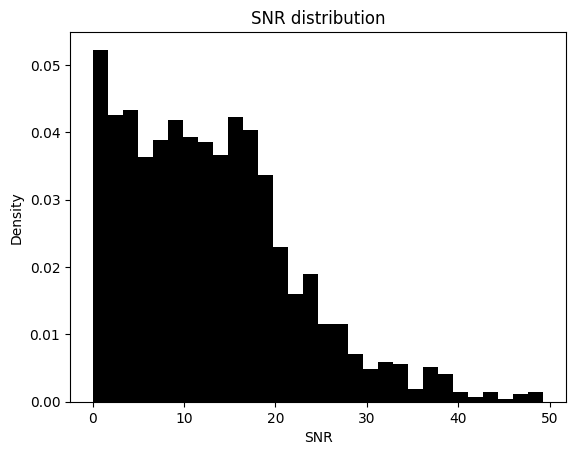

In [ ]:
# plotting the SNR distribution (net)
test = np.array(unlensed_params["optimal_snr_net"])
test = test[test<50]
plt.hist(test, bins=30, color='k', density=True)
plt.xlabel("SNR")
plt.ylabel("Density")
plt.title("SNR distribution")
#plt.xlim(0, 100)
plt.show()


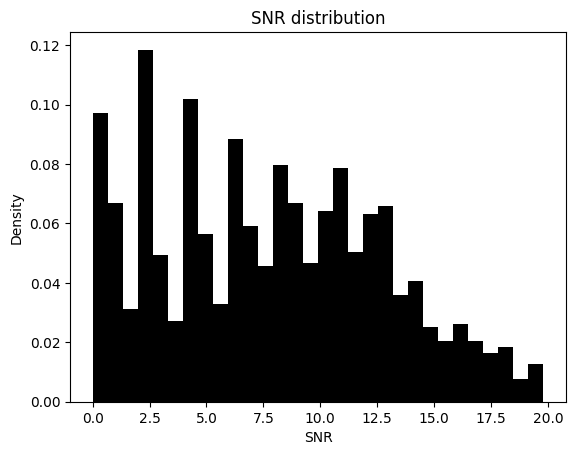

In [ ]:
# plotting the SNR distribution (L1 detector)
test = np.array(unlensed_params["L1"])
test = test[test<20]
plt.hist(test, bins=30, color='k', density=True)
plt.xlabel("SNR")
plt.ylabel("Density")
plt.title("SNR distribution")
#plt.xlim(0, 100)
plt.show()

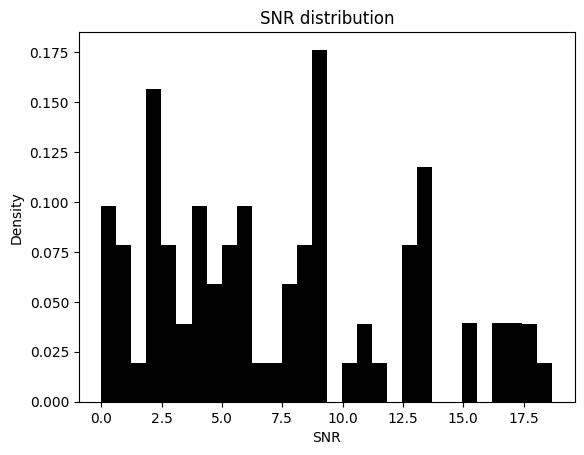

In [ ]:
# plotting the SNR distribution (H1 detector)
unlensed_params = load_json("snr_H1.json")
test = np.array(unlensed_params["H1"])
test = test[test<20]
plt.hist(test, bins=30, color='k', density=True)
plt.xlabel("SNR")
plt.ylabel("Density")
plt.title("SNR distribution")
#plt.xlim(0, 100)
plt.show()

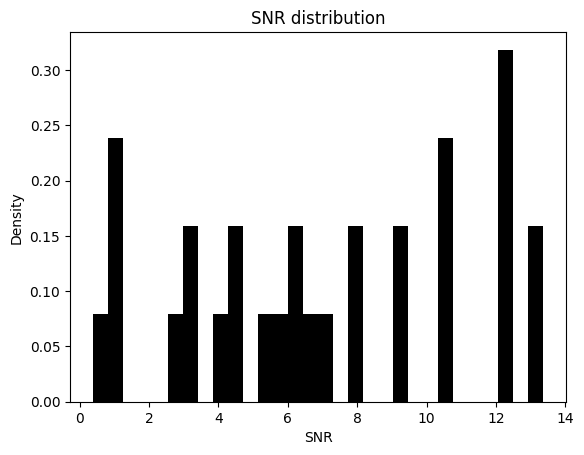

In [ ]:
# plotting the SNR distribution (V1 detector)
unlensed_params = load_json("snr_V1.json")
test = np.array(unlensed_params["V1"])
test = test[test<20]
plt.hist(test, bins=30, color='k', density=True)
plt.xlabel("SNR")
plt.ylabel("Density")
plt.title("SNR distribution")
#plt.xlim(0, 100)
plt.show()